 1. [15 marks] Write Python codes to verify that the compensated summation algorithm and the
sorted sum, where at first the numbers are sorted using quicksort and then summed, are
numerically equivalent algorithms. Compare the errors obtained in these two methods with the
vanilla iterative summation method. [ Hint: generate an array of floating point numbers by first
generating n random integers between a and b then adding an integer multiple of the machine
epsilon to each number to make those floating point numbers. Vary n to see the effect on error]

# Solution 1

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import sys

In [2]:
a = int(input("Enter value of a: "))

b = int(input("Enter value of b: "))

Enter value of a: 1234
Enter value of b: 12345


In [3]:
m_factor = 1000000
epsilon = sys.float_info.epsilon

In [4]:
def sum_error(n_total):
    
    e1 = []
    e2 = []
    e3 = []
    o_index = []
    
    for n in range(1, n_total+1):
    
        lst = np.array([(random.uniform(a, b) + (m_factor*epsilon)) for i in range(n)])
    
        #Unsorted Sum
        sum_1 = sum(lst)
    
        #Sorted Sum
        sum_2 = sum(np.sort(lst))
    
        #Compensated Sum
        sum_3 = 0.0
        c = 0.0
        for i in range(0, n):
            y = lst[i] - c
            t = sum_3 + y
            z = t - sum_3
            c = z - y
            sum_3 = t
        
        e1.append(np.abs(sum_1 - sum_3))
        e2.append(np.abs(sum_1 - sum_3))
        e3.append(np.abs(sum_2 - sum_3))
        o_index.append(n)
    
    error_pd = pd.DataFrame(list(zip(e1, e2, e3)), index = o_index, 
                            columns = ['Unsorted-Sorted', 'Unsorted-Compensated', 'Sorted-Compensated'])
    
    return error_pd

In [5]:
n_max = 50
err = sum_error(n_max)

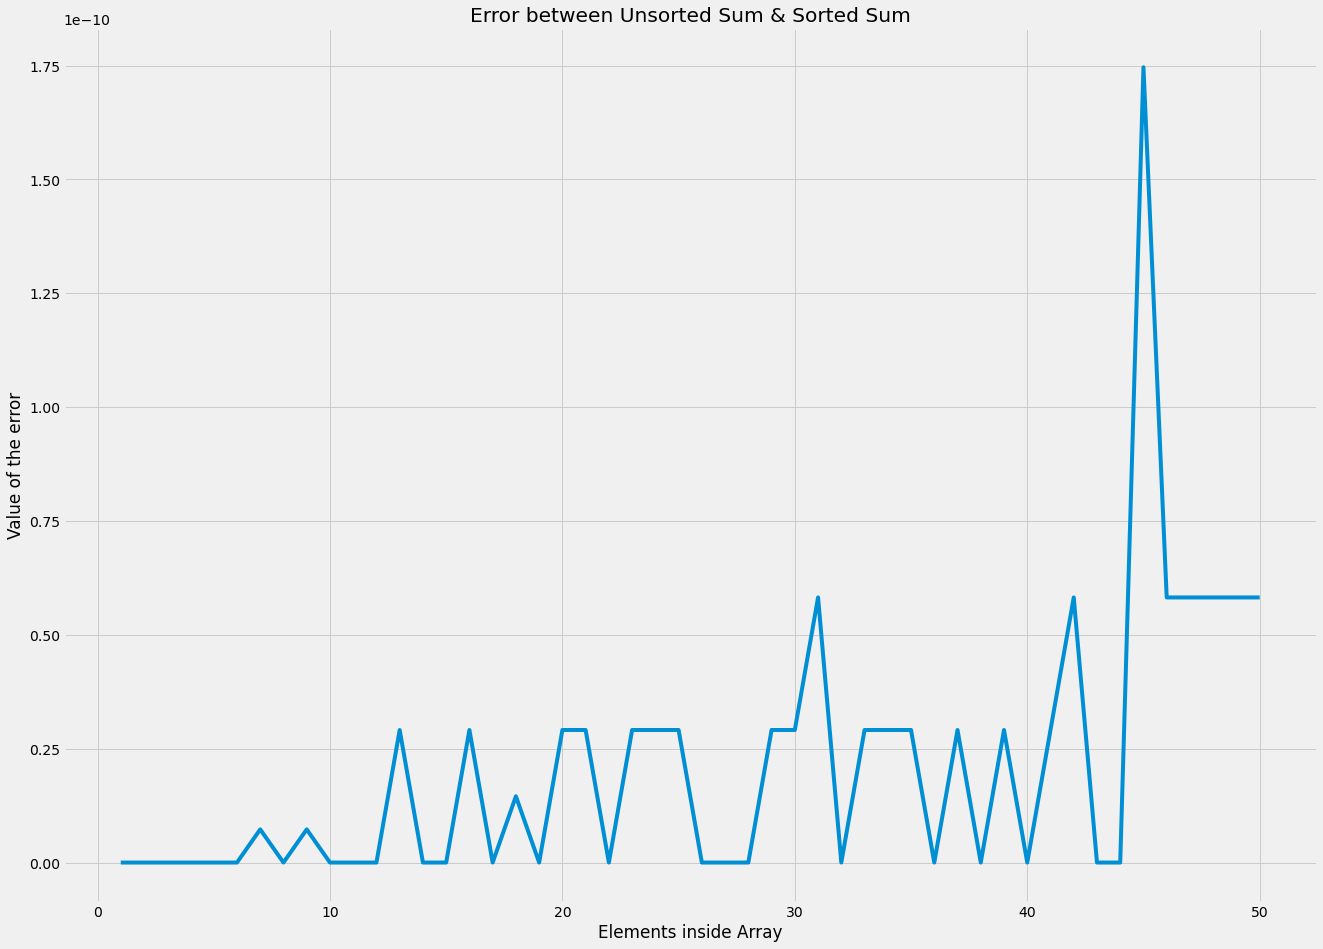

In [22]:
plt.figure(figsize=(20,15))
plt.plot(err['Unsorted-Sorted'])
plt.xlabel("Elements inside Array")
plt.ylabel("Value of the error")
plt.title("Error between Unsorted Sum & Sorted Sum")
plt.show()

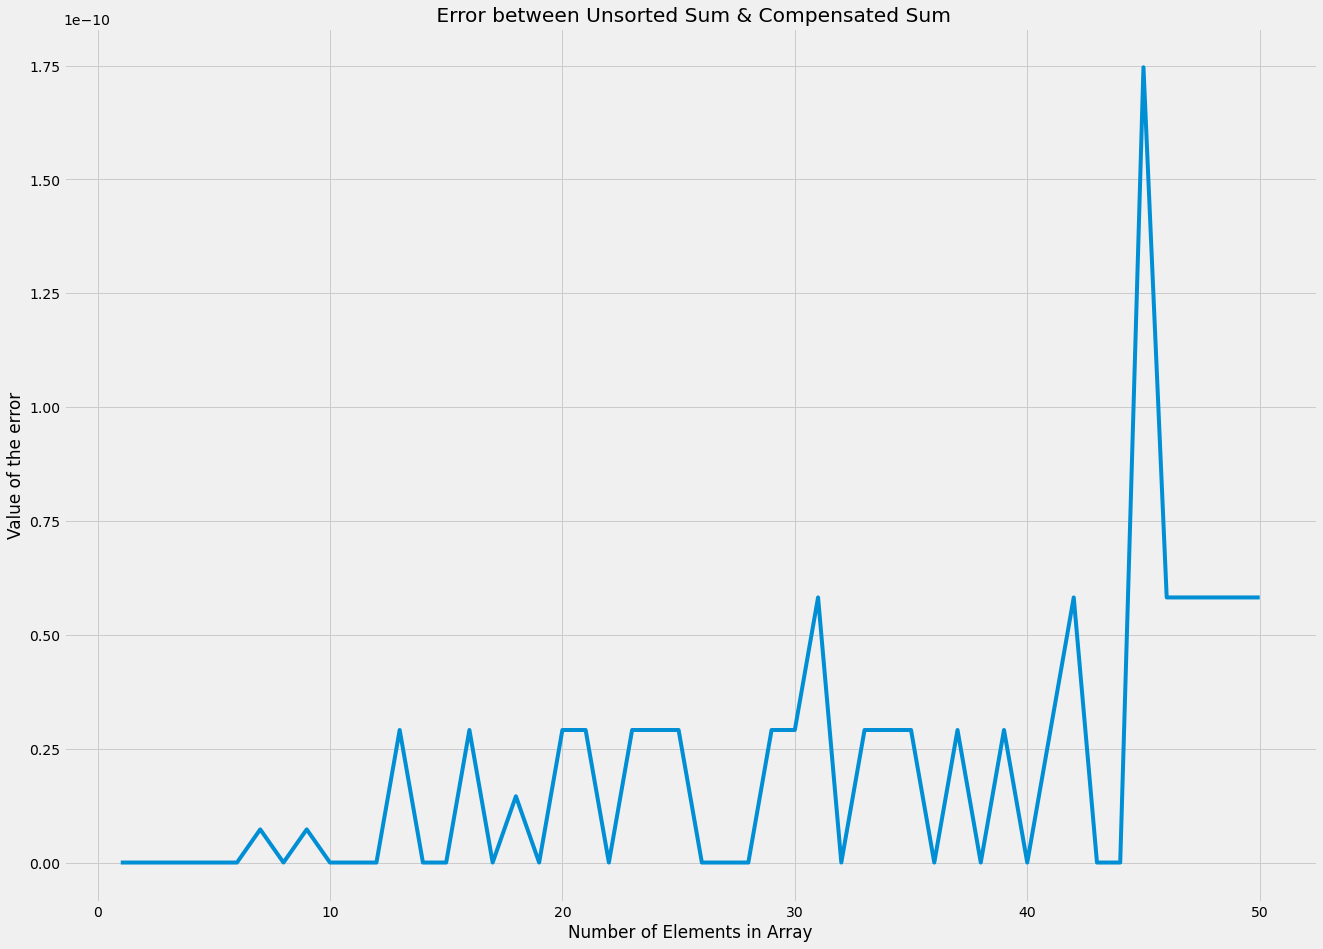

In [23]:
plt.figure(figsize=(20,15))
plt.plot(err['Unsorted-Compensated'])
plt.xlabel("Number of Elements in Array")
plt.ylabel("Value of the error")
plt.title(" Error between Unsorted Sum & Compensated Sum")
plt.show()

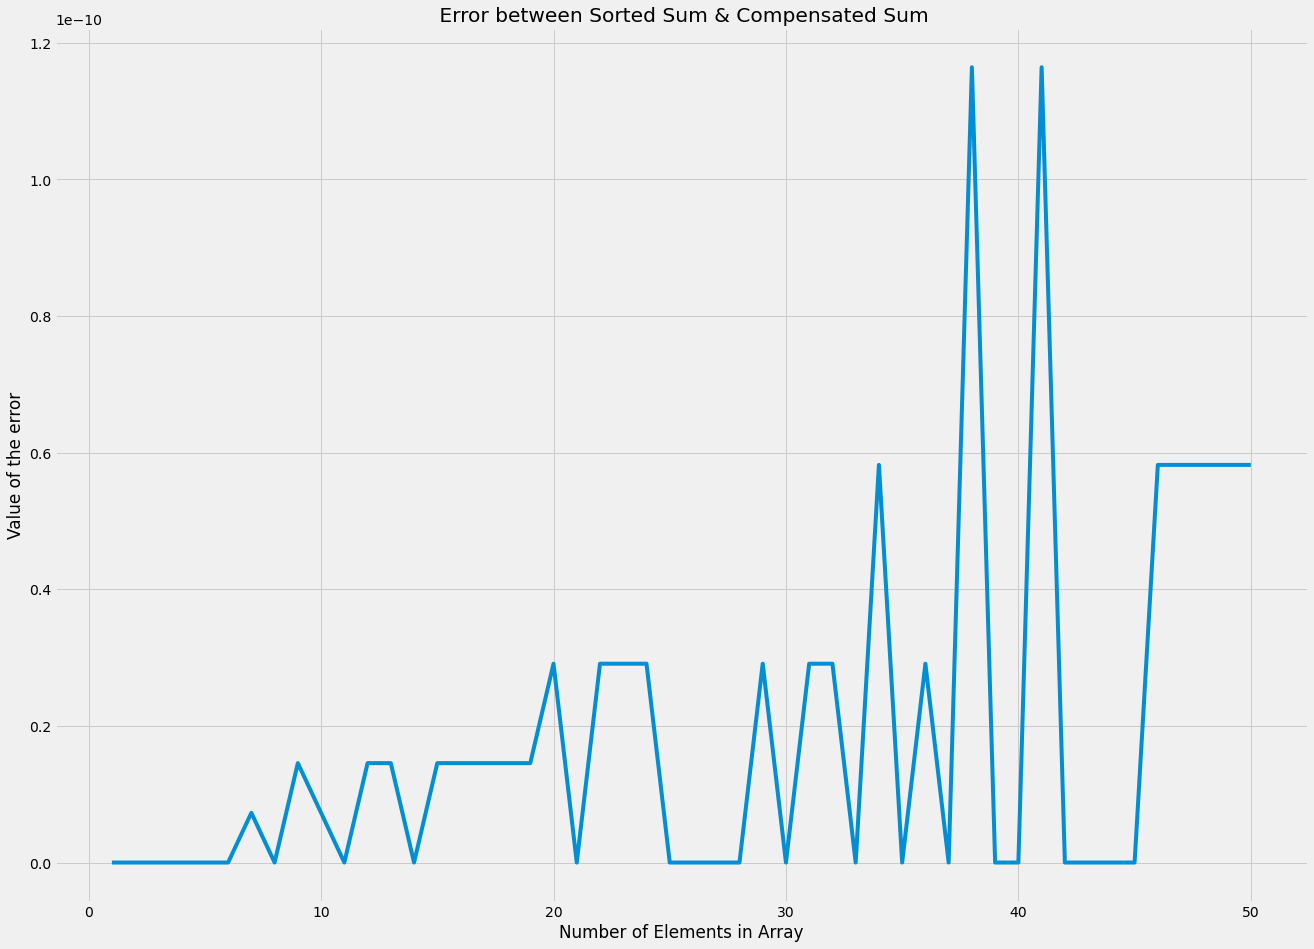

In [24]:
plt.figure(figsize=(20,15))
plt.plot(err['Sorted-Compensated'])
plt.xlabel("Number of Elements in Array")
plt.ylabel("Value of the error")
plt.title(" Error between Sorted Sum & Compensated Sum")
plt.show()

# Solution 2

In [18]:
import math

In [15]:
c = float(input("Enter value of c: "))

i = float(input("Enter value of i: "))

Enter value of c: 10
Enter value of i: 0.01


In [16]:
n = 365
x = i/365

In [19]:
ci_vanilla = c*(math.e**(n*math.log(1+x))-1)/x
ci_vanilla

3668.2604841437646

In [20]:
ci_misc =  c*(math.e**(n*((x*math.log(1+x))/((1+x)-1)))-1)/x
ci_misc

3668.260484138821

In [25]:
log_mac = 0.0                  

for i in range(1, 366):
    log_mac += (-1)**(i+1)*(x**i)/i
     
ci_maclaurin = c*(math.e**(n*log_mac)-1)/x    
ci_maclaurin

3668.260484138821

In [27]:

print("compound interest calculated by normal formula is =" , ci_vanilla)
print("compound interest calculated by Maclaurin series for log (1 + x) is =",ci_maclaurin)
print("compound interest calculated using log(1 + x) = x log(1 + x))/((1 + x) -1) is =",ci_misc)

compound interest calculated by normal formula is = 3668.2604841437646
compound interest calculated by Maclaurin series for log (1 + x) is = 3668.260484138821
compound interest calculated using log(1 + x) = x log(1 + x))/((1 + x) -1) is = 3668.260484138821
